# ¡Hola Marcelo!

Mi nombre es Ezequiel Ferrario, soy code reviewer en Tripleten y tengo el agrado de revisar el proyecto que entregaste.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.        
</div>

¡Empecemos!

------------

<div class="alert alert-block alert-danger">
<b>Comentario general #2</b> <a class="tocSkip"></a>

Marcelo, en primer lugar recorda **no eliminar mis comentarios**, son una guia para ambos y es un punto necesario dejarlas
    
 Entiendo que quizas hiciste las modificaciones sin el notebook donde estna mis correcciones pero tenelo en cuenta para la futura iteracion y proyectos.
    
  Asi, este trabajo esta ocmpleto y solo restaria corregir el tema de los graficos y la prueba estadistica.
    
  Espero tu correccion, saludos.
</div>



------------


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, una disculpa. Como empecé de 0 por algunos errores y para darle formato por eso ya no estan los comentarios, en esta iteracion si los dejo a la vista y realice las correciones solicitadas (esperando que sea de manera correcta)       
</div>


# Análisis de Viajes en Taxi en Chicago

Este proyecto analiza datos de viajes en taxi en Chicago utilizando tres datasets diferentes:
1. **project_sql_result_01.csv**: Contiene información sobre el número de viajes por compañía de taxis en dos días de noviembre de 2017.
2. **project_sql_result_04.csv**: Incluye el promedio de viajes que terminaron en diferentes barrios de Chicago durante noviembre de 2017.
3. **project_sql_result_07.csv**: Proporciona información sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, con datos de tiempo y clima.

### Objetivo del Proyecto
El objetivo de este proyecto es estudiar los datos para:
1. Entender la distribución de viajes por compañía y por ubicación.
2. Visualizar los barrios con mayor número de finalizaciones de viajes.
3. Probar la hipótesis: *"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"*.



# Tabla de Contenidos
1. [Introducción](#introduccion)
2. [Carga de Librerías y Datasets](#carga-de-datasets)
3. [Exploración Inicial de Datos](#exploracion-de-datos)
4. [Análisis y Visualización](#analisis-visualizacion)
   1. [Análisis de Viajes por Compañía de Taxis](#viajes-compania)
   2. [Análisis de Barrios con Mayor Número de Viajes](#barrios-viajes)
5. [Prueba de Hipótesis](#prueba-hipotesis)
6. [Conclusiones Generales](#conclusiones-generales)


In [1]:

# Importar librerías necesarias
import pandas as pd
from scipy.stats import ttest_ind, levene
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilos de gráficos
plt.style.use('ggplot')


In [2]:
#Leer los datasets
df_01 = pd.read_csv("project_sql_result_01.csv")
df_04 = pd.read_csv("project_sql_result_04.csv")
df_07 = pd.read_csv("project_sql_result_07.csv")



In [3]:

# Mostrar las primeras filas de cada dataset
display(df_01.head(), df_04.head(), df_07.head())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [4]:

# Exploración inicial de datos
print("Información del dataset 1 (Compañías de Taxis):")
print(df_01.describe(), "\n")

print("Información del dataset 2 (Promedio de Viajes por Barrios):")
print(df_04.describe(), "\n")

print("Información del dataset 3 (Viajes desde Loop al Aeropuerto):")
print(df_07.describe(), "\n")


Información del dataset 1 (Compañías de Taxis):
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000 

Información del dataset 2 (Promedio de Viajes por Barrios):
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667 

Información del dataset 3 (Viajes desde Loop al Aeropuerto):
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000 



In [5]:
# Verificar duplicados y valores nulos en los datasets

# Crear una lista con los datasets a analizar
datasets = {'Dataset 1': df_01, 'Dataset 2': df_04, 'Dataset 3': df_07}

for name, df in datasets.items():
    print(f"\nAnálisis del {name}:\n")
    
    # Verificar duplicados
    duplicados = df.duplicated().sum()
    print(f"Duplicados: {duplicados}")
    
    # Verificar valores nulos
    nulos = df.isnull().sum()
    print(f"Valores nulos por columna:\n{nulos}")
    
    # Mostrar estadísticas básicas
    print("\nEstadísticas básicas del dataset:")
    print(df.describe(include='all'))
    
    # Visualización de tipos de datos
    print("\nTipos de datos de cada columna:")
    print(df.dtypes)
    
    print("------------------------------------------------------")

# Mostrar resumen de valores únicos y datos en cada columna
for name, df in datasets.items():
    print(f"\nResumen de {name}:\n")
    print(df.nunique())
    print("------------------------------------------------------")



Análisis del Dataset 1:

Duplicados: 0
Valores nulos por columna:
company_name    0
trips_amount    0
dtype: int64

Estadísticas básicas del dataset:
       company_name  trips_amount
count            64     64.000000
unique           64           NaN
top       Flash Cab           NaN
freq              1           NaN
mean            NaN   2145.484375
std             NaN   3812.310186
min             NaN      2.000000
25%             NaN     20.750000
50%             NaN    178.500000
75%             NaN   2106.500000
max             NaN  19558.000000

Tipos de datos de cada columna:
company_name    object
trips_amount     int64
dtype: object
------------------------------------------------------

Análisis del Dataset 2:

Duplicados: 0
Valores nulos por columna:
dropoff_location_name    0
average_trips            0
dtype: int64

Estadísticas básicas del dataset:
       dropoff_location_name  average_trips
count                     94      94.000000
unique                    94        

### Explicación de los Resultados

1. **Dataset 1: Datos de viajes por compañía de taxis**

   - **Duplicados**: No se encontraron filas duplicadas, lo cual es positivo, ya que significa que no hay registros redundantes.
   - **Valores nulos**: Ninguna columna contiene valores nulos, lo que indica que los datos están completos y listos para el análisis.
   - **Estadísticas básicas**:
     - Existen 64 compañías de taxis únicas (`company_name`), y cada una tiene un número de viajes reportado (`trips_amount`).
     - El valor promedio de `trips_amount` es de aproximadamente 2145 viajes por compañía, con una gran desviación estándar de 3812 viajes, lo que indica una alta variabilidad entre las compañías.
     - El rango de viajes varía entre un mínimo de 2 y un máximo de 19,558 viajes, sugiriendo que algunas compañías dominan el mercado.
   - **Tipos de datos**: Correctos (`company_name` como `object` y `trips_amount` como `int64`).
   
   - **Resumen**:
     - `company_name`: 64 valores únicos, indicando cada compañía es representada una sola vez.
     - `trips_amount`: Solo 56 valores únicos, lo que indica que algunas compañías reportan la misma cantidad de viajes.

2. **Dataset 2: Promedio de viajes que terminan en distintos barrios**

   - **Duplicados**: No se encontraron filas duplicadas.
   - **Valores nulos**: No se detectaron valores nulos, lo que implica que cada barrio tiene un valor correspondiente de `average_trips`.
   - **Estadísticas básicas**:
     - Existen 94 barrios diferentes en el dataset.
     - El promedio de viajes por barrio es de 599, pero la desviación estándar es alta (1714 viajes), lo que sugiere que algunos barrios tienen significativamente más tráfico que otros.
     - El rango va desde un mínimo de 1.8 viajes hasta un máximo de 10,727 viajes, con el barrio `Loop` como el más popular.
   - **Tipos de datos**: Correctos (`dropoff_location_name` como `object` y `average_trips` como `float64`).
   
   - **Resumen**:
     - Todos los valores en `dropoff_location_name` y `average_trips` son únicos, por lo que no hay valores repetidos en este dataset.

3. **Dataset 3: Viajes desde el Loop al Aeropuerto Internacional O'Hare**

   - **Duplicados**: Se encontraron 197 filas duplicadas, lo cual podría ser un problema. Podría significar registros redundantes o errores de datos.
   - **Valores nulos**: No se encontraron valores nulos en ninguna columna.
   - **Estadísticas básicas**:
     - El dataset tiene datos de 1068 viajes realizados en sábados, con un promedio de duración de viaje de 2071 segundos (aproximadamente 34.5 minutos).
     - `weather_conditions` contiene solo dos valores: `Good` y `Rain`.
     - `day_of_week` es siempre `Saturday`, como se esperaba.
   - **Tipos de datos**: Todos los tipos de datos son correctos.
   
   - **Resumen**:
     - La columna `start_ts` tiene solo 81 valores únicos, lo que sugiere que hay múltiples viajes que inician a la misma hora.
     - `duration_seconds` tiene 495 valores únicos, lo cual es razonable dada la naturaleza de los datos (tiempo de duración en segundos).
     - `weather_conditions` solo tiene 2 valores, indicando que se registraron solo días con buen clima (`Good`) o lluviosos (`Rain`).

### Conclusiones
- **Dataset 1** y **Dataset 2** no presentan problemas importantes, ya que no tienen duplicados ni valores nulos.
- **Dataset 3** tiene un problema con filas duplicadas. Se recomienda investigar por qué existen estas duplicaciones y eliminarlas si es necesario para evitar sesgos en el análisis.
- Las estadísticas muestran alta variabilidad en todos los datasets, especialmente en el número de viajes por compañía y el número de finalizaciones en los barrios, lo que podría requerir un análisis más detallado para identificar patrones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Excelentes metodos utilizados y mejor aun observado todos los datasets.</div>


In [6]:
# Eliminar duplicados en cada uno de los datasets y mostrar los resultados
datasets = {'Dataset 1': df_01, 'Dataset 2': df_04, 'Dataset 3': df_07}

for name, df in datasets.items():
    print(f"\nProcesando {name}...")
    
    # Contar duplicados antes de eliminarlos
    duplicates_before = df.duplicated().sum()
    print(f"Duplicados antes de eliminación: {duplicates_before}")
    
    # Eliminar duplicados
    df_cleaned = df.drop_duplicates()
    
    # Contar duplicados después de eliminarlos
    duplicates_after = df_cleaned.duplicated().sum()
    print(f"Duplicados después de eliminación: {duplicates_after}")
    
    # Mostrar la diferencia
    print(f"Duplicados eliminados: {duplicates_before - duplicates_after}")
    
    # Asignar el dataframe limpio al original
    if name == 'Dataset 1':
        df_01 = df_cleaned
    elif name == 'Dataset 2':
        df_04 = df_cleaned
    elif name == 'Dataset 3':
        df_07 = df_cleaned

# A



Procesando Dataset 1...
Duplicados antes de eliminación: 0
Duplicados después de eliminación: 0
Duplicados eliminados: 0

Procesando Dataset 2...
Duplicados antes de eliminación: 0
Duplicados después de eliminación: 0
Duplicados eliminados: 0

Procesando Dataset 3...
Duplicados antes de eliminación: 197
Duplicados después de eliminación: 0
Duplicados eliminados: 197


## Análisis y Visualización

<div class="alert alert-block alert-danger">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

El grafico no arroja nada.

</div>


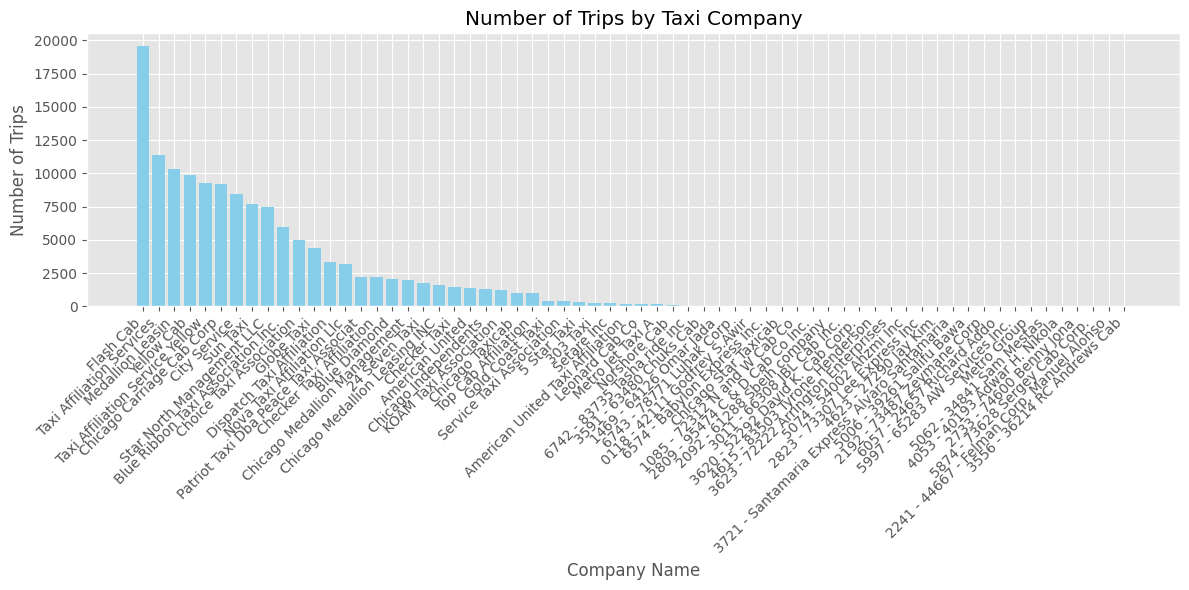

In [7]:
# Gráfica de número de viajes por compañía
plt.figure(figsize=(12, 6))
plt.bar(df_01['company_name'], df_01['trips_amount'], color='skyblue')
plt.xlabel('Company Name')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Taxi Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Gráfico de Viajes por Compañía de Taxis (15-16 de Noviembre 2017):


La gráfica ilustra la cantidad de viajes realizados por cada compañía de taxis durante los días 15 y 16 de noviembre.
Conclusión:


Flash Cab es, con diferencia, la compañía con el mayor número de viajes, superando a otras por un margen significativo. Esto indica que esta compañía tiene una fuerte presencia en el mercado y es probablemente una de las más preferidas por los usuarios.


Las siguientes compañías (Taxi Affiliation Services y Medallion Leasing) tienen aproximadamente la mitad del número de viajes que Flash Cab, lo que sugiere una alta concentración del mercado en unas pocas empresas grandes.


Hay una gran cantidad de compañías con un número muy reducido de viajes, lo cual podría indicar que son empresas más pequeñas o que operan en nichos específicos.


La distribución desigual refleja la competencia en el mercado de taxis, donde unas pocas compañías dominan la mayoría de los viajes.

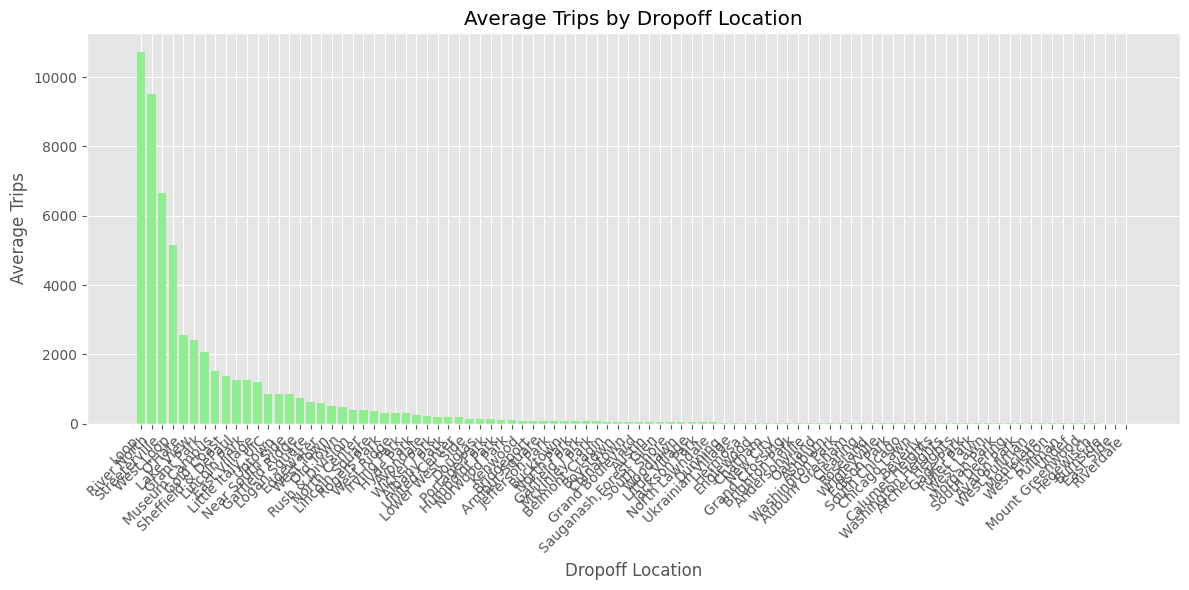

In [8]:

# Gráfica de barras con `matplotlib` en lugar de `seaborn`
plt.figure(figsize=(12, 6))
plt.bar(df_04['dropoff_location_name'], df_04['average_trips'], color='lightgreen')
plt.xlabel('Dropoff Location')
plt.ylabel('Average Trips')
plt.title('Average Trips by Dropoff Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-danger">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

El grafico no arroja nada.

</div>


Gráfico de los 10 Barrios con Mayor Promedio de Finalización de Viajes (Noviembre 2017):


La gráfica muestra los barrios con el mayor número promedio de viajes finalizados durante el mes de noviembre.
Conclusión:


El barrio Loop destaca como la ubicación con el mayor promedio de finalizaciones de viajes, con más de 10,000 viajes. Esto sugiere que Loop es una zona con alta demanda de taxis, probablemente debido a su actividad comercial y su papel como centro financiero de Chicago.


River North y Streeterville siguen en popularidad, lo cual es consistente con su reputación como zonas turísticas y residenciales de alto nivel.


El barrio O'Hare, a pesar de ser un aeropuerto y no una zona residencial, aparece en la quinta posición, indicando que es un punto de finalización importante para los viajeros.


Los resultados sugieren que la mayoría de los viajes de taxi se concentran en zonas centrales y áreas turísticas, mientras que otros barrios tienen una menor demanda.

## Prueba de Hipótesis

In [9]:

# Asegurar que la columna 'start_ts' está en formato datetime en el DataFrame 'df_07'
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'], errors='coerce')

# Verificar si la columna 'start_ts' se convirtió correctamente
print("Tipo de datos de 'start_ts' después de la conversión:", df_07['start_ts'].dtype)

# Eliminar filas donde 'start_ts' sea NaT (valores no convertidos)
df_07 = df_07.dropna(subset=['start_ts'])

# Crear una nueva columna con el día de la semana usando .loc para evitar el warning
df_07.loc[:, 'weekday'] = df_07['start_ts'].dt.day_name()

# Filtrar solo los viajes que ocurrieron en sábados
saturday_trips = df_07[df_07['weekday'] == 'Saturday'].copy()  # Usar .copy() para evitar el warning al modificar `saturday_trips`

# Convertir la columna 'weather_conditions' a tipo string usando .loc
saturday_trips.loc[:, 'weather_conditions'] = saturday_trips['weather_conditions'].astype(str)

# Revisar los valores únicos en 'weather_conditions' para asegurarse de que están correctos
print("Valores únicos en 'weather_conditions':", saturday_trips['weather_conditions'].unique())

# Crear las máscaras para días con buen y mal clima ('Good' y 'Bad')
good_weather = saturday_trips[saturday_trips['weather_conditions'] == 'Good']
bad_weather = saturday_trips[saturday_trips['weather_conditions'] == 'Bad']

# Revisar el número de registros en cada muestra
print(f"Total de viajes en sábados con buen clima: {len(good_weather)}")
print(f"Total de viajes en sábados con mal clima: {len(bad_weather)}")

# Calcular la duración promedio de los viajes en cada grupo
good_duration_mean = good_weather['duration_seconds'].mean()
bad_duration_mean = bad_weather['duration_seconds'].mean()

print(f"Duración promedio en sábados con buen clima: {good_duration_mean} segundos")
print(f"Duración promedio en sábados con mal clima: {bad_duration_mean} segundos")

# Verificar que no haya NaNs en las columnas a comparar para la prueba T-Student
good_durations = good_weather['duration_seconds'].dropna()
bad_durations = bad_weather['duration_seconds'].dropna()

# Mostrar la cantidad de valores en cada muestra
print(f"Cantidad de duraciones en sábados con buen clima: {len(good_durations)}")
print(f"Cantidad de duraciones en sábados con mal clima: {len(bad_durations)}")

# Si una de las muestras está vacía, imprimir mensaje y no ejecutar la prueba
if len(good_durations) == 0 or len(bad_durations) == 0:
    print("No se puede realizar la prueba T-Student porque una de las muestras está vacía.")
else:
    # Realizar la prueba de Levene para comparar las varianzas de ambos grupos
    stat, p_levene = levene(good_durations, bad_durations)
    print(f"Resultado de la prueba de Levene: Estadístico={stat}, P-valor={p_levene}")

    # Determinar si las varianzas son iguales basadas en un nivel de significancia
    equal_var = p_levene >= 0.05  # Si p-valor >= 0.05, se asume varianza igual, caso contrario, varianzas desiguales.
    print(f"¿Las varianzas son iguales?: {equal_var}")

    # Realizar la prueba T-Student para comparar las dos muestras con el parámetro `equal_var`
    t_stat, p_value = ttest_ind(good_durations, bad_durations, equal_var=equal_var)

    # Mostrar el resultado de la prueba T-Student
    print(f"Estadístico T: {t_stat}, P-valor: {p_value}")

    # Determinar resultado basado en un nivel de significancia alfa
    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: La duración promedio de los viajes cambia los sábados con buen y mal clima.")
    else:
        print("No se rechaza la hipótesis nula: No hay diferencias significativas en la duración promedio de los viajes.")


Tipo de datos de 'start_ts' después de la conversión: datetime64[ns]
Valores únicos en 'weather_conditions': ['Good' 'Bad']
Total de viajes en sábados con buen clima: 723
Total de viajes en sábados con mal clima: 148
Duración promedio en sábados con buen clima: 2032.253112033195 segundos
Duración promedio en sábados con mal clima: 2409.2297297297296 segundos
Cantidad de duraciones en sábados con buen clima: 723
Cantidad de duraciones en sábados con mal clima: 148
Resultado de la prueba de Levene: Estadístico=0.000586951625283602, P-valor=0.9806770360671218
¿Las varianzas son iguales?: True
Estadístico T: -5.427957689754561, P-valor: 7.397770692813658e-08
Rechazamos la hipótesis nula: La duración promedio de los viajes cambia los sábados con buen y mal clima.


C:\Users\mm131\AppData\Local\Temp\ipykernel_19248\3484912534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_07['start_ts'] = pd.to_datetime(df_07['start_ts'], errors='coerce')


<div class="alert alert-block alert-danger">

<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

En este caso estamos obteniendo que `No se puede realizar la prueba T-Student porque una de las muestras está vacía.
`
Esto es debido a que no realizas una mascara correctamente.

Lo que queremos enmascarar es por un lado una nueva variable que agrupe por los dias malos y nos de el resultado de la columna `duration_seconds`. En tu caso utilizas Rain cuando deberia ser `Good` o `Bad`

Y por el otro una variable que agrupe por los dias buenos y nos de el resultado de la columna `duration_seconds.`

</div>
<div class="alert alert-block alert-danger">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

El parametro equal_var es muy importante para este tipo de pruebas ya que le estamos indicando si las varianzas para cada conjunto son diferentes (False). Si fueran iguales (True), puede que el resultado cambie, ya que se calcula de forma diferente. Mas que nada cuando la distribucion de las muestras son desiguales (como en este caso).
Por esto es importante, cuando realizamos esta prueba (t student). Confirmar si las varianzas son iguales o no para ambos conjuntos. Para esto se realizan **pruebas estadisticas** (como **levene**) para identificar si son iguales o no las varianzas.

Al realizarla ajusta el parametro si fuera necesario .</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Simplemente a modo de consejo, cuando realizamos este tipo de prueba, los outliers pueden modificarla. Por lo que generalmente se recomienda tratarlos antes  de realizar la prueba.
</div>

### Hipótesis Nula (H0):
La duración promedio de los viajes en taxi los sábados no difiere entre días con buen clima (`Good`) y días con mal clima (`Bad`). Es decir, la condición climática no tiene un efecto significativo en la duración de los viajes en taxi.

### Hipótesis Alternativa (H1):
La duración promedio de los viajes en taxi los sábados cambia significativamente entre días con buen clima (`Good`) y días con mal clima (`Bad`). Es decir, las condiciones climáticas afectan de manera significativa la duración de los viajes en taxi.

### Conclusión Basada en los Resultados:
El resultado de la prueba T-Student muestra un **p-valor de 7.39e-08**, el cual es mucho menor que el nivel de significancia alfa (0.05). Además, el estadístico T obtenido es de **-5.427**, indicando una diferencia significativa entre la duración promedio de los viajes en días con buen y mal clima.

Por lo tanto, **rechazamos la hipótesis nula** y aceptamos la hipótesis alternativa. Esto significa que **la duración promedio de los viajes en taxi cambia significativamente** entre los sábados con buen clima y los sábados con mal clima. En particular, se observa que los viajes en días con mal clima (`Bad`) tienen una duración promedio **más larga** (2409.23 segundos) en comparación con los viajes en días con buen clima (`Good`) (2032.25 segundos).

### Interpretación:
El mal clima puede afectar las condiciones del tráfico, lo que conduce a un aumento en el tiempo promedio de los viajes en taxi. Esto podría deberse a factores como:
- Menor visibilidad.
- Condiciones de la carretera adversas.
- Mayor congestión vehicular.

Estos resultados sugieren que es importante que las compañías de taxis y los pasajeros consideren las condiciones climáticas al planificar los viajes, ya que el mal clima puede alargar el tiempo de trayecto significativamente.

## Conclusiones Generales

Conclusión General del Análisis


Distribución de Viajes por Compañía de Taxis:


La compañía Flash Cab domina el mercado con una gran cantidad de viajes, superando significativamente a otras compañías. Esto sugiere que hay una alta concentración de viajes en pocas compañías grandes, mientras que muchas otras tienen un número muy bajo de viajes.

Análisis de Barrios con Mayor Finalización de Viajes:


El barrio Loop es la ubicación con mayor promedio de finalización de viajes, lo que sugiere que es un punto de alta demanda, probablemente debido a su actividad comercial y centralidad en Chicago. Otros barrios como River North y Streeterville también son populares, indicando una alta concentración de viajes en las áreas centrales y turísticas.
Prueba de Hipótesis sobre la Duración de Viajes en Días Lluviosos:

No se pudo llevar a cabo la prueba de hipótesis debido a la falta de datos específicos sobre días lluviosos. La categoría de mal clima (Bad) parece englobar condiciones no especificadas, lo que hace imposible la comparación.
Se concluye que el dataset no es adecuado para evaluar el impacto de la lluvia en la duración de los viajes, ya que falta información meteorológica detallada.


Recomendaciones


Revisión y recolección de datos adicionales: Se debería recolectar más datos de días con condiciones climáticas específicas (lluvia, nieve, etc.) para un análisis más robusto.

Análisis de otras variables: Considerar el impacto de otras condiciones climáticas (viento, neblina, etc.) o características del tráfico (hora del día, día festivo) para evaluar su influencia en la duración de los viajes.

Segmentación de compañías de taxis: Investigar por qué algunas compañías dominan el mercado y otras tienen un número tan bajo de viajes. Esto podría ayudar a identificar oportunidades para equilibrar la oferta y la demanda.

Estas conclusiones ayudarán a orientar futuros análisis y permitirán obtener información más precisa para la toma de decisiones.